## Mall Customers Clustering Analysis

### Import libraries

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from matplotlib import cm
import random
import matplotlib.colors as mcolors

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [2]:
# importing the dataset
data = pd.read_csv('2021-06-20-barranquilla-apartamento-venta-FR-details.csv', sep=',', nrows=2000)
data.head()

,Unnamed: 0,lat,long,id,date,category,location,mode,price,details,description,surface,rooms,baths,park
0,0,11.014266,-74.828629,6320787,2021-06-20,Apartamento,Barranquilla Riomar,Venta,$830.000.000,"['Área Const.:\r 198,00...",ESPECTACJLARAPARTAMENTOUBICADOENZONAEXCLUSIVAD...,"\r198,00m²\r\r",\r\rHabitaciones:\r3\r\r,\r\rBaños:\r4\r\r,\r\rParqueaderos:2\r\r
1,1,0.000000,0.000000,6424956,2021-06-20,Apartamento,Barranquilla Riomar,Venta,$550.000.000,"['Área Const.:\r 125,00...",ModernoapartamentoenventaSalacomedorcocinabalc...,"\r125,00m²\r\r",\r\rHabitaciones:\r3\r\r,\r\rBaños:\r2\r\r,\r\rSinespecificar\r\r
2,2,10.991757,-74.789032,4800830,2021-06-20,Apartamento,Barranquilla PRADO,Venta,$189.000.000,"['Área privada:\r 76,00...","VENDEMOSAPARTAMENTODE76,31METROS,CONSTADE3ALCO...","\r76,31m²\r\r",\r\rHabitaciones:\r3\r\r,\r\rBaños:\r2\r\r,\r\rParqueaderos:1\r\r
3,3,11.017447,-74.818871,5255250,2021-06-20,Apartamento,Barranquilla riomar,Venta,$295.000.000,"['Área privada:\r 122,0...",DeoportunidadVENDOdirectamente.REMODELADOTOTAL...,"\r136,00m²\r\r",\r\rHabitaciones:\r4\r\r,\r\rBaños:\r4\r\r,\r\rParqueaderos:1\r\r
4,4,11.018365,-74.825417,6391876,2021-06-20,Apartamento,Barranquilla Buenavista,Venta,$677.000.000,"['Área privada:\r 138,0...","Modernoapartamento,ubicadoenexclusivosectordel...","\r138,00m²\r\r",\r\rHabitaciones:\r3\r\r,\r\rBaños:\r3\r\r,\r\rParqueaderos:2\r\r


In [3]:
# checking if there is any NULL data
data.isnull().sum()

Unnamed: 0     0
lat            0
long           0
id             0
date           0
category       0
location       0
mode           0
price          0
details        0
description    0
surface        0
rooms          0
baths          0
park           0
dtype: int64

In [4]:
# value counts of location column
data['location'].value_counts()

Barranquilla Altos de Riomar               126
Barranquilla Villa Santos                  103
Barranquilla Alto Prado                    100
Barranquilla Riomar                         82
Barranquilla Villa Campestre                77
                                          ... 
Barranquilla Altos de Prado                  1
Barranquilla puntabrava puerto colombia      1
Barranquilla La Pradera                      1
Barranquilla Corredor Universitario          1
Barranquilla san vicente                     1
Name: location, Length: 342, dtype: int64

In [5]:
# convert string location to integer
locations = data.location.unique()
location_dict = dict(zip(locations, range(len(locations))))
# print(location_dict)

data['location_values'] = data['location']
for old, new in location_dict.items():
    data['location_values'] = data['location_values'].replace(old, new)
    
data['location_values'].value_counts()

25     126
14     103
63     100
0       82
16      77
      ... 
19       1
211      1
213      1
214      1
341      1
Name: location_values, Length: 342, dtype: int64

In [6]:
# value counts of price column
data['price'].value_counts()

$220.000.000      44
$230.000.000      43
$180.000.000      39
$280.000.000      39
$260.000.000      39
                  ..
$161.000.000       1
$349.000.000       1
$1.040.000.000     1
$603.000.000       1
$744.000.000       1
Name: price, Length: 384, dtype: int64

In [7]:
# convert string price to integer
# prices = data.price.unique()
# price_dict = dict(zip(prices, range(len(prices))))

# data['prices_values'] = data['price']
# for old, new in price_dict.items():
#     data['prices_values'] = data['prices_values'].replace(old, new)

# data['prices_values'].value_counts()

In [8]:
# convert string price to float
data['prices_values'] = pd.to_numeric(data['price'].str[1:].str.replace('.', ''))
# delete top5 values of price
for _ in range(0, 10):
    data = data[data['prices_values']!=data['prices_values'].max()]

In [9]:
# convert string category to integer
categories = data.category.unique()
category_dict = dict(zip(categories, range(len(categories))))

data['category_values'] = data['category']
for old, new in category_dict.items():
    data['category_values'] = data['category_values'].replace(old, new)

data['category_values'].value_counts()

0    1868
1     106
Name: category_values, dtype: int64

In [10]:
# describe data
data.drop(['Unnamed: 0', 'id'], axis=1).describe()

,lat,long,location_values,prices_values,category_values
count,1974.000000,1974.000000,1974.000000,1.974000e+03,1974.000000
mean,9.865473,-67.598990,81.276596,3.778015e+08,0.053698
std,4.582938,22.134591,79.599195,2.250251e+08,0.225478
min,-74.813667,-76.642876,0.000000,9.000000e+06,0.000000
25%,10.990000,-74.825996,21.000000,2.200000e+08,0.000000
50%,11.005989,-74.816116,61.000000,3.056354e+08,0.000000
75%,11.013899,-74.804714,110.000000,4.800000e+08,0.000000
max,51.780197,14.240499,341.000000,1.448400e+09,1.000000


In [11]:
data['date'].value_counts()

2021-06-20    1974
Name: date, dtype: int64

In [12]:
data['mode'].value_counts()

Venta    1974
Name: mode, dtype: int64

In [13]:
data = data.drop(['id', 'Unnamed: 0', 'price', 'location', 'details', 'description', 'category', 'mode', 'date'], axis=1)

In [14]:
data['rooms'] = data.rooms.str.extract('(\d+)')
data['rooms'] = pd.to_numeric(data['rooms'])

In [15]:
data['rooms'].value_counts()

3.0     1285
2.0      362
4.0      171
1.0      140
5.0        7
10.0       1
Name: rooms, dtype: int64

In [16]:
data['baths'] = data.baths.str.extract('(\d+)')
data['baths'] = pd.to_numeric(data['baths'])

In [17]:
data['baths'].value_counts()

2.0    916
3.0    497
4.0    266
1.0    194
5.0     93
6.0      3
Name: baths, dtype: int64

In [18]:
data['park'] = data.park.str.extract('(\d+)')
data['park'] = pd.to_numeric(data['park'])

In [19]:
data['park'].value_counts()

1.0     1144
2.0      556
3.0       28
4.0        6
10.0       2
6.0        1
Name: park, dtype: int64

In [20]:
data['surface'] = data['surface'].str.replace('\r', '').str.replace('m²', '').str.replace('.', '').str.replace(',', '.')
data['surface'] = pd.to_numeric(data['surface'])
data['surface'].value_counts()

70.00     56
110.00    41
72.00     33
90.00     32
68.00     29
          ..
74.62      1
192.00     1
176.00     1
56.67      1
255.00     1
Name: surface, Length: 267, dtype: int64

In [21]:
for _ in range(0, 10):
    data = data[data['surface']!=data['surface'].max()]

In [22]:
data.isnull().sum()

lat                  0
long                 0
surface              0
rooms                8
baths                5
park               236
location_values      0
prices_values        0
category_values      0
dtype: int64

In [23]:
# delete rows with any null value
data = data.dropna(how='any',axis=0) 

In [24]:
data.isnull().sum()

lat                0
long               0
surface            0
rooms              0
baths              0
park               0
location_values    0
prices_values      0
category_values    0
dtype: int64

In [25]:
data.head()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
0,11.014266,-74.828629,198.00,3.0,4.0,2.0,0,830000000,0
2,10.991757,-74.789032,76.31,3.0,2.0,1.0,1,189000000,0
3,11.017447,-74.818871,136.00,4.0,4.0,1.0,2,295000000,0
4,11.018365,-74.825417,138.00,3.0,3.0,2.0,3,677000000,0
5,10.997395,-74.840584,66.00,3.0,2.0,1.0,4,230000000,0


In [26]:
data.describe()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1.720000e+03,1720.000000
mean,10.098636,-68.548848,113.668738,2.774419,2.631977,1.368605,75.790116,3.906458e+08,0.056977
std,3.604217,20.760534,52.239010,0.745151,1.001465,0.612220,76.043569,2.204612e+08,0.231866
min,-22.434000,-76.642876,34.000000,1.000000,1.000000,1.000000,0.000000,6.000000e+07,0.000000
25%,10.992862,-74.825996,74.000000,3.000000,2.000000,1.000000,20.000000,2.350000e+08,0.000000
50%,11.006898,-74.817013,103.000000,3.000000,2.000000,1.000000,57.000000,3.200000e+08,0.000000
75%,11.014006,-74.806549,139.000000,3.000000,3.000000,2.000000,101.000000,4.900000e+08,0.000000
max,51.780197,14.240499,330.000000,10.000000,6.000000,10.000000,341.000000,1.448400e+09,1.000000


## Data Visualization

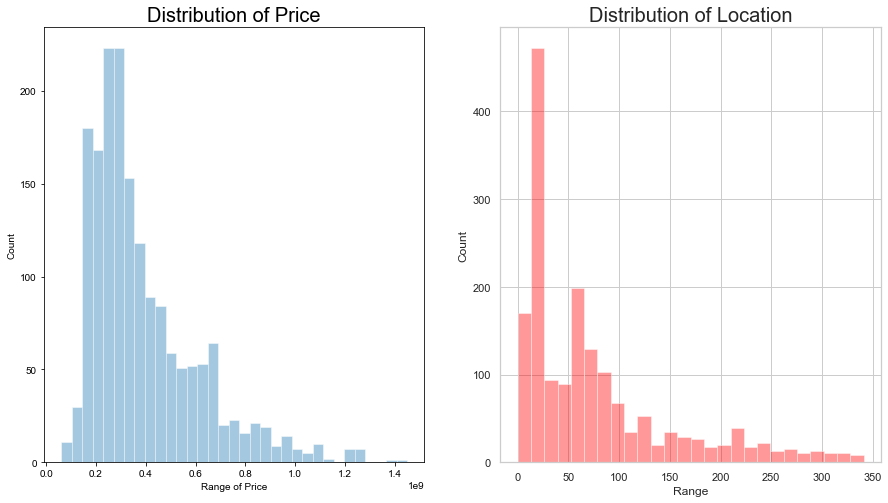

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['prices_values'], kde=False)
plt.title('Distribution of Price', fontsize = 20)
plt.xlabel('Range of Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['location_values'], color = 'red', kde=False)
plt.title('Distribution of Location', fontsize = 20)
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

In [28]:
data['rooms'].value_counts()

3.0     1140
2.0      292
4.0      149
1.0      132
5.0        6
10.0       1
Name: rooms, dtype: int64

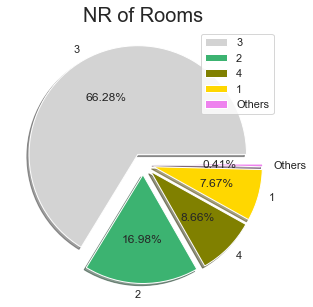

In [29]:
labels = ['3', '2', '4', '1', 'Others']
size = data['rooms'].value_counts()
size2 = size[:1]
size2['Others'] = sum(size[5:])

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(labels))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size2, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('NR of Rooms', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [30]:
data['category_values'].value_counts()

0    1622
1      98
Name: category_values, dtype: int64

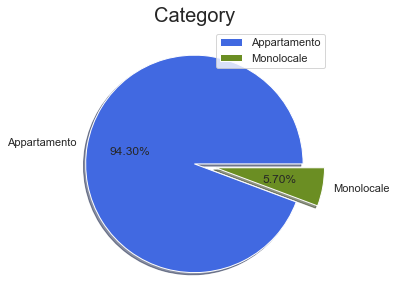

In [31]:
labels = ['Appartamento', 'Monolocale']
size = data['category_values'].value_counts()
#print(size)
# colors = cm.Set1(np.arange(40))
# colors = cm.rainbow(np.linspace(0, 1, len(labels)))
colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(labels))
explode = [0, 0.2]

plt.figure(figsize=(5,5))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Category', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

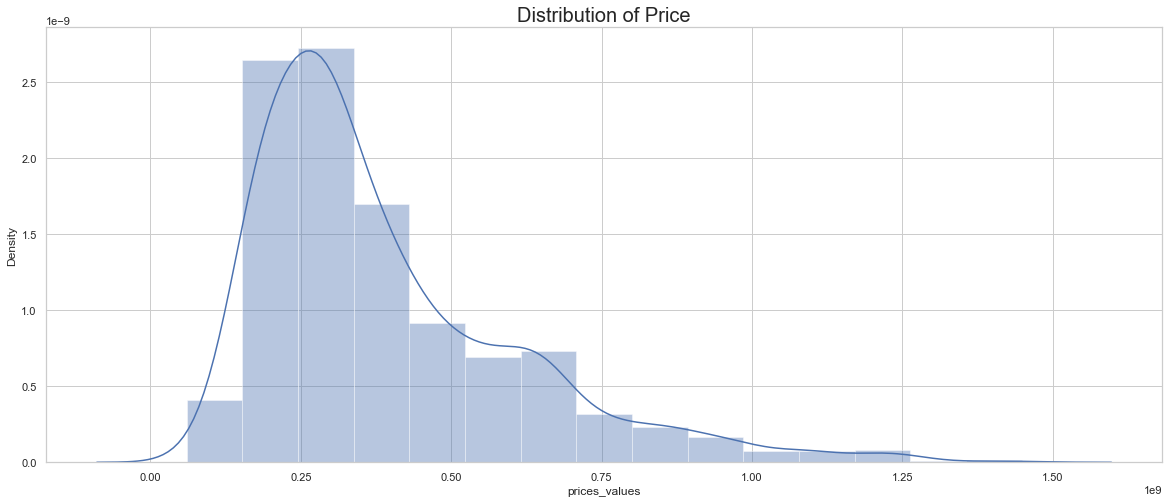

In [32]:
plt.figure(figsize=(20,8))
sns.distplot(data['prices_values'], bins=15)
plt.title('Distribution of Price', fontsize = 20)
plt.show()

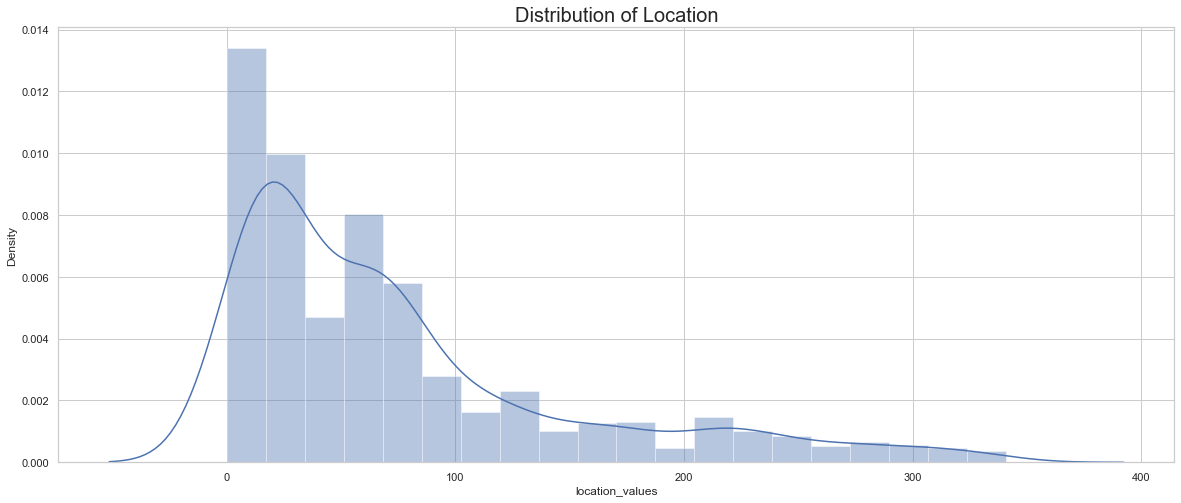

In [33]:
plt.figure(figsize=(20,8))
sns.distplot(data['location_values'], bins=20)
plt.title('Distribution of Location', fontsize = 20)
plt.show()

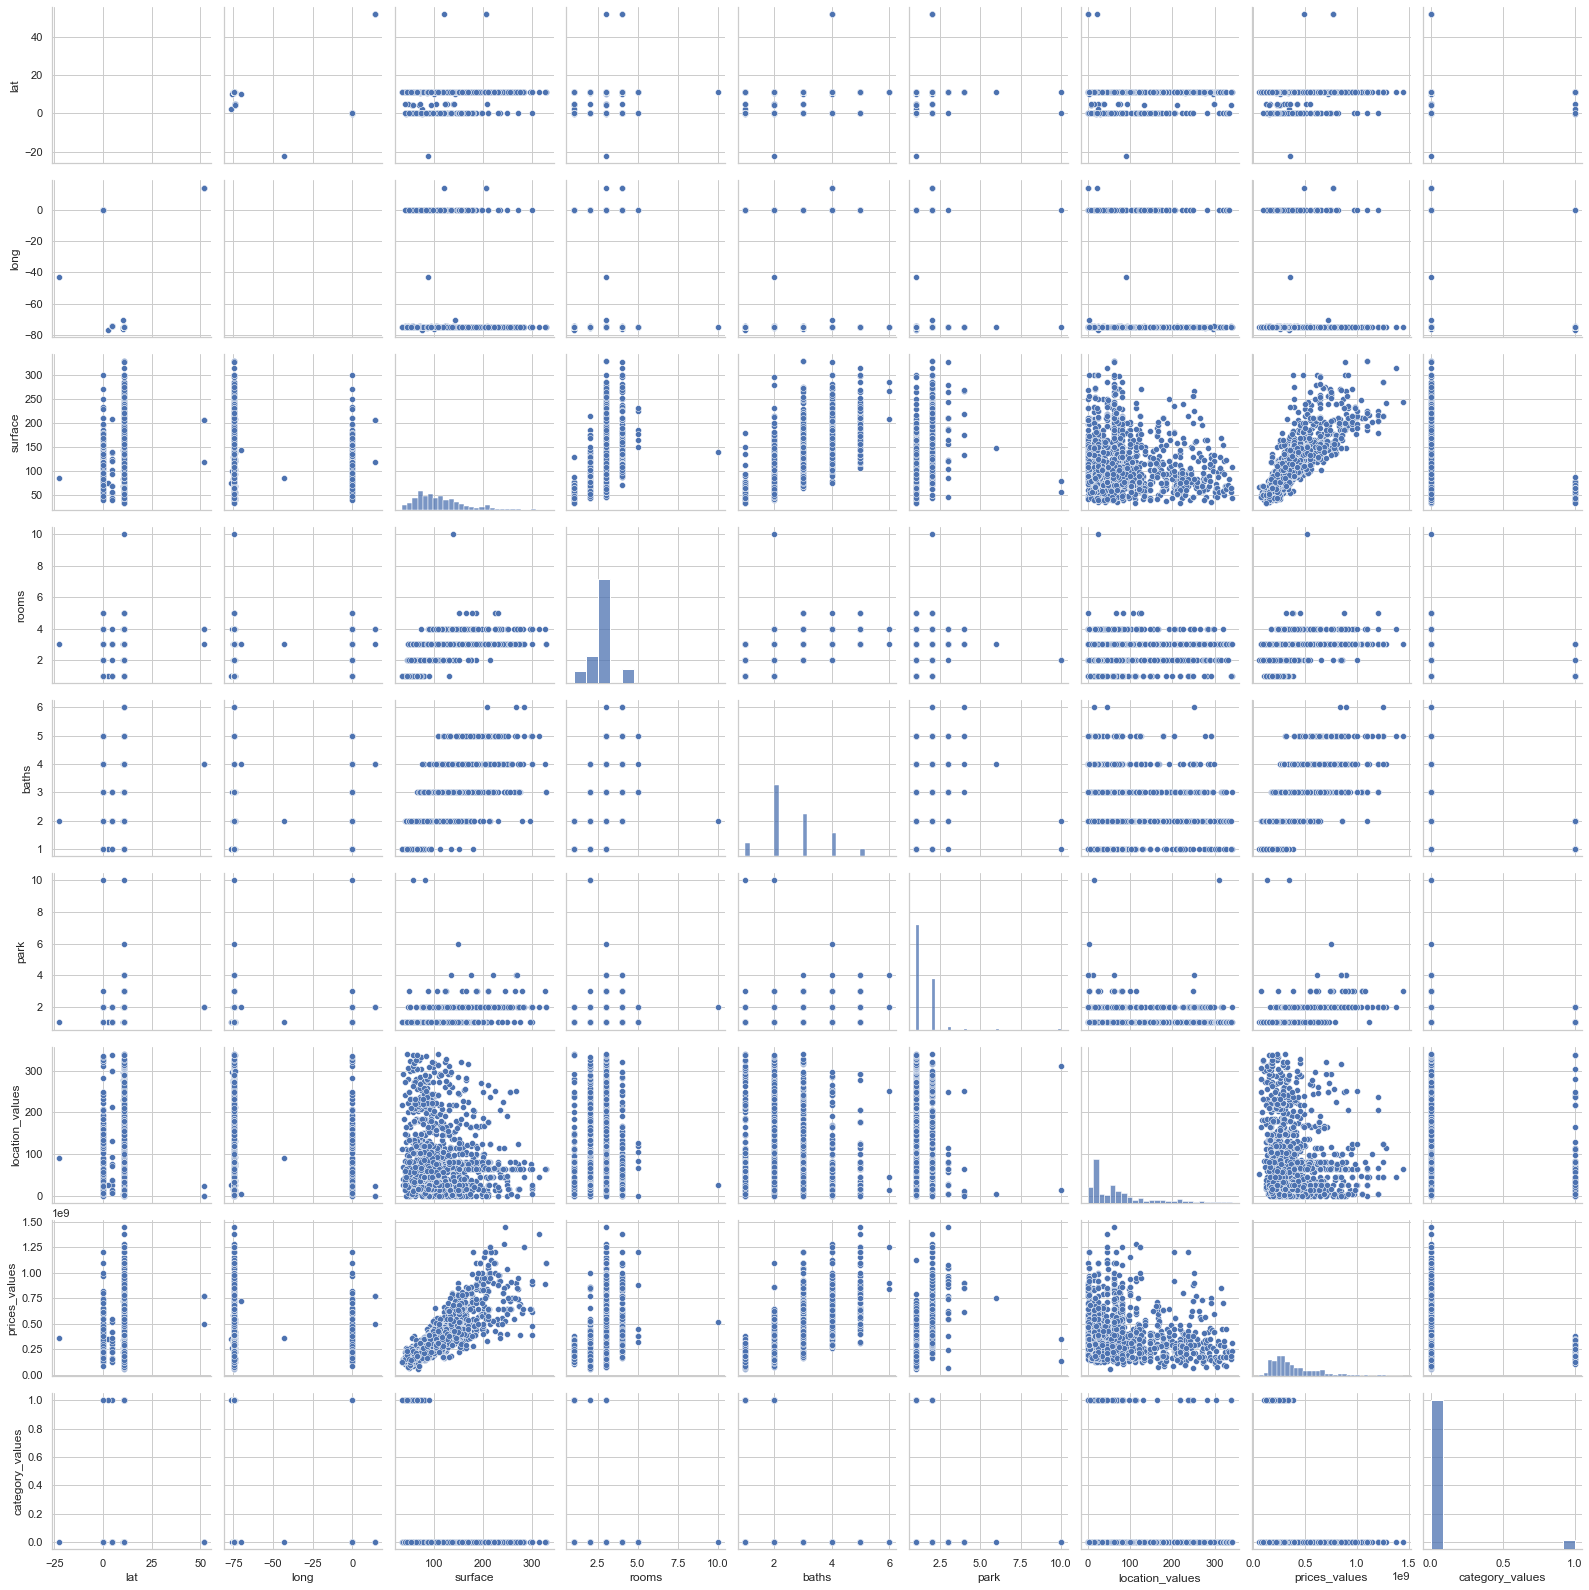

In [34]:
sns.pairplot(data)

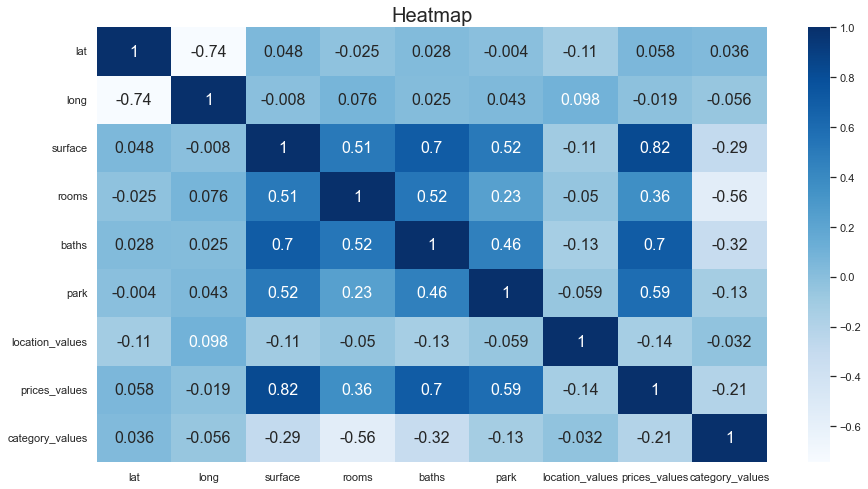

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

## Clustering Analysis

In [36]:
data.head()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
0,11.014266,-74.828629,198.00,3.0,4.0,2.0,0,830000000,0
2,10.991757,-74.789032,76.31,3.0,2.0,1.0,1,189000000,0
3,11.017447,-74.818871,136.00,4.0,4.0,1.0,2,295000000,0
4,11.018365,-74.825417,138.00,3.0,3.0,2.0,3,677000000,0
5,10.997395,-74.840584,66.00,3.0,2.0,1.0,4,230000000,0


In [37]:
# take only location and price
x = data.iloc[:, [-3,-2]].values

# let's check the shape of x
print(x.shape)

(1720, 2)


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

WCSS (Within-Cluster Sum of Square) is the sum of squared distance between each point and the centroid in a cluster. 

Text(0, 0.5, 'wcss')

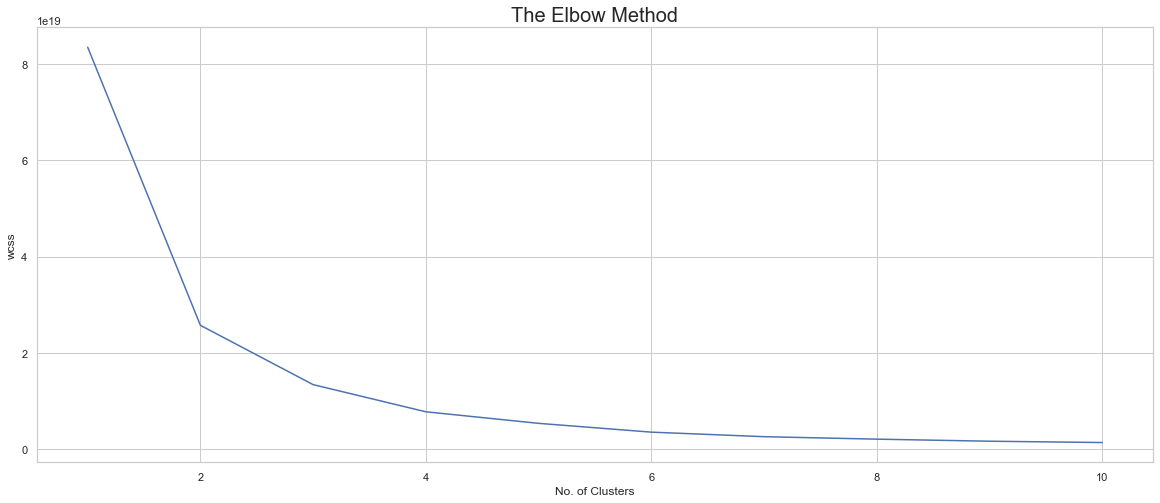

In [38]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

## Visualizing Clusters

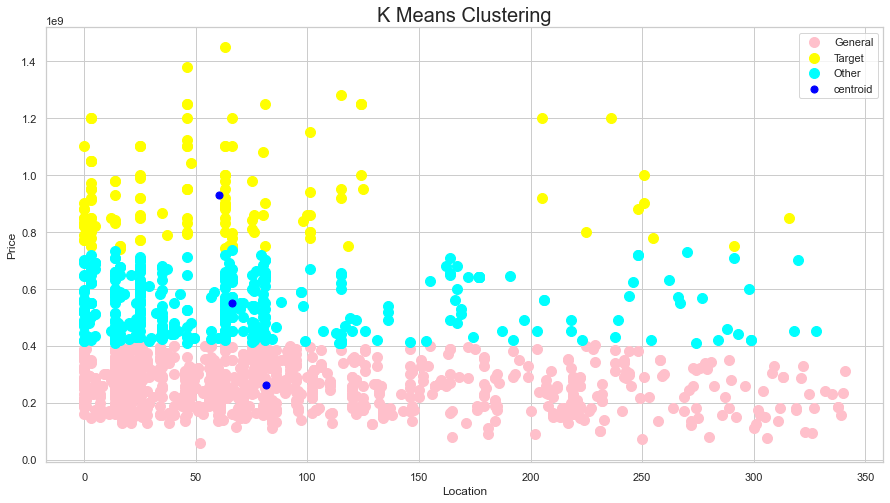

In [39]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'General')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Other')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Location')
plt.ylabel('Price')
plt.legend()
plt.show()

## Hierarchial Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Visualizing the Clusters of Hierarchial Clustering**

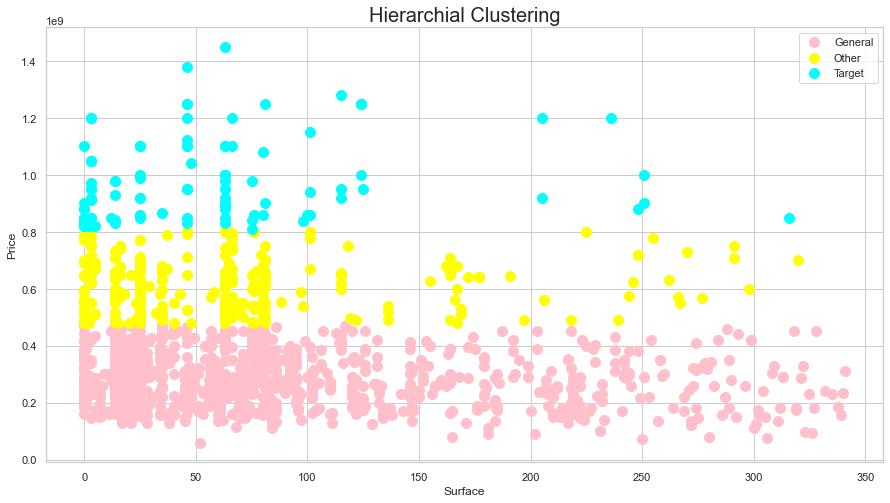

In [40]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s =  100, c = 'pink', label = 'General')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Other')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Target')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Surface')
plt.ylabel('Price')
plt.legend()
plt.show()

### Clusters of Price Based on the Surface

In [41]:
data.head()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
0,11.014266,-74.828629,198.00,3.0,4.0,2.0,0,830000000,0
2,10.991757,-74.789032,76.31,3.0,2.0,1.0,1,189000000,0
3,11.017447,-74.818871,136.00,4.0,4.0,1.0,2,295000000,0
4,11.018365,-74.825417,138.00,3.0,3.0,2.0,3,677000000,0
5,10.997395,-74.840584,66.00,3.0,2.0,1.0,4,230000000,0


In [42]:
# take only surface and price
x = data.iloc[:, [2, -2]].values
x.shape

(1720, 2)

**K-means Algorithm**

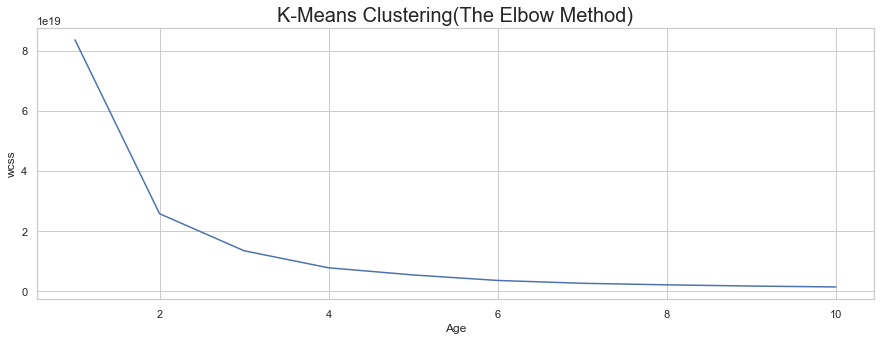

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('wcss')
plt.show()

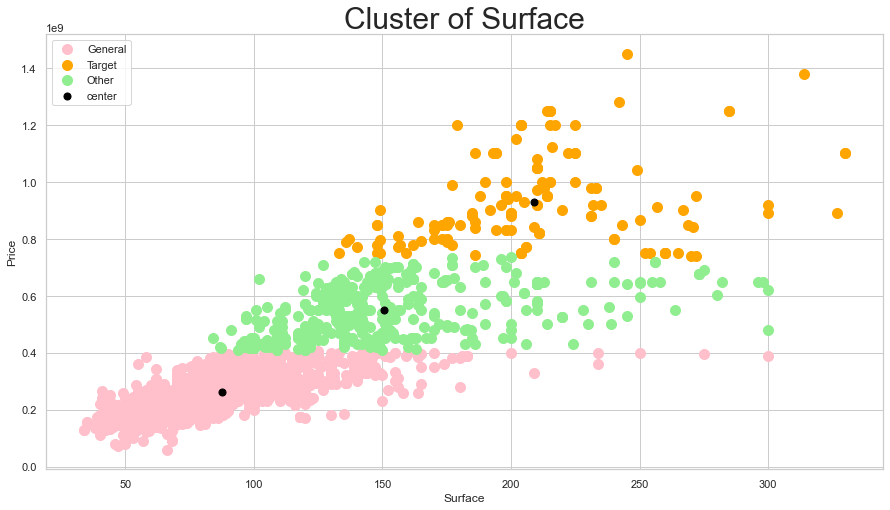

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of Surface', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'General')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Target')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Other')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('Surface')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
data.head()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
0,11.014266,-74.828629,198.00,3.0,4.0,2.0,0,830000000,0
2,10.991757,-74.789032,76.31,3.0,2.0,1.0,1,189000000,0
3,11.017447,-74.818871,136.00,4.0,4.0,1.0,2,295000000,0
4,11.018365,-74.825417,138.00,3.0,3.0,2.0,3,677000000,0
5,10.997395,-74.840584,66.00,3.0,2.0,1.0,4,230000000,0


In [46]:
data_new = data.drop(['lat', 'long'], axis=1)

In [47]:
data_new.head()

,surface,rooms,baths,park,location_values,prices_values,category_values
0,198.00,3.0,4.0,2.0,0,830000000,0
2,76.31,3.0,2.0,1.0,1,189000000,0
3,136.00,4.0,4.0,1.0,2,295000000,0
4,138.00,3.0,3.0,2.0,3,677000000,0
5,66.00,3.0,2.0,1.0,4,230000000,0


In [48]:
data_new.describe()

,surface,rooms,baths,park,location_values,prices_values,category_values
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1.720000e+03,1720.000000
mean,113.668738,2.774419,2.631977,1.368605,75.790116,3.906458e+08,0.056977
std,52.239010,0.745151,1.001465,0.612220,76.043569,2.204612e+08,0.231866
min,34.000000,1.000000,1.000000,1.000000,0.000000,6.000000e+07,0.000000
25%,74.000000,3.000000,2.000000,1.000000,20.000000,2.350000e+08,0.000000
50%,103.000000,3.000000,2.000000,1.000000,57.000000,3.200000e+08,0.000000
75%,139.000000,3.000000,3.000000,2.000000,101.000000,4.900000e+08,0.000000
max,330.000000,10.000000,6.000000,10.000000,341.000000,1.448400e+09,1.000000


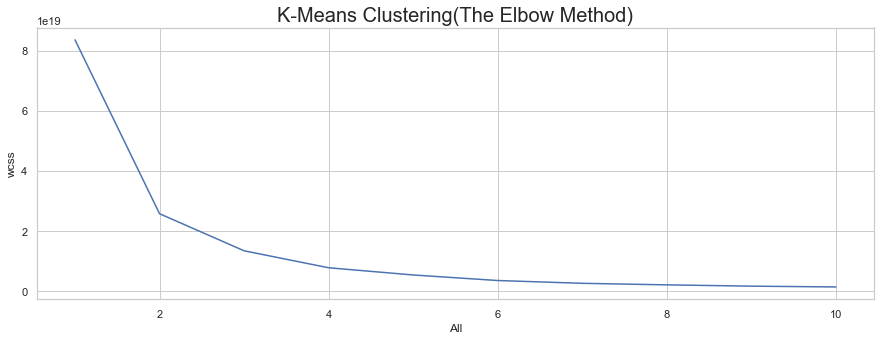

In [49]:
from sklearn.cluster import KMeans

x = data_new.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)

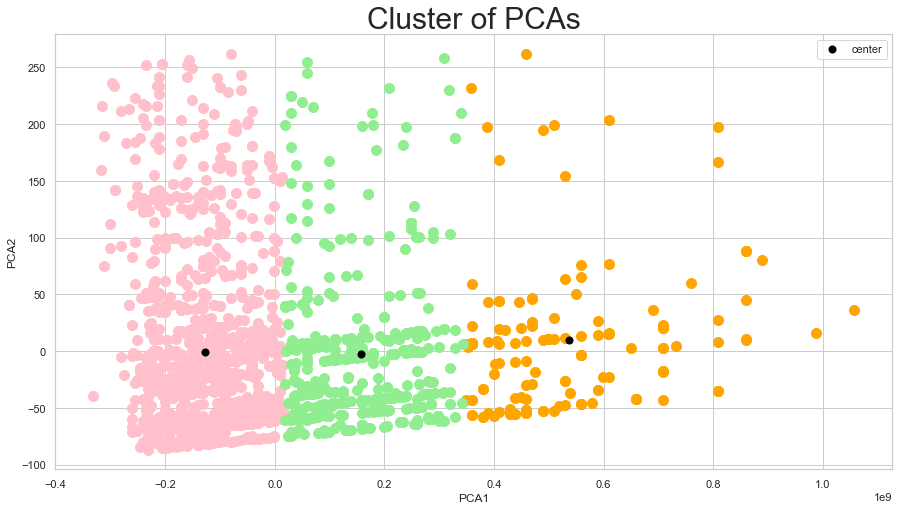

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
# plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
# plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
# plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [52]:
data.head()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
0,11.014266,-74.828629,198.00,3.0,4.0,2.0,0,830000000,0
2,10.991757,-74.789032,76.31,3.0,2.0,1.0,1,189000000,0
3,11.017447,-74.818871,136.00,4.0,4.0,1.0,2,295000000,0
4,11.018365,-74.825417,138.00,3.0,3.0,2.0,3,677000000,0
5,10.997395,-74.840584,66.00,3.0,2.0,1.0,4,230000000,0


In [53]:
data.describe()

,lat,long,surface,rooms,baths,park,location_values,prices_values,category_values
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1.720000e+03,1720.000000
mean,10.098636,-68.548848,113.668738,2.774419,2.631977,1.368605,75.790116,3.906458e+08,0.056977
std,3.604217,20.760534,52.239010,0.745151,1.001465,0.612220,76.043569,2.204612e+08,0.231866
min,-22.434000,-76.642876,34.000000,1.000000,1.000000,1.000000,0.000000,6.000000e+07,0.000000
25%,10.992862,-74.825996,74.000000,3.000000,2.000000,1.000000,20.000000,2.350000e+08,0.000000
50%,11.006898,-74.817013,103.000000,3.000000,2.000000,1.000000,57.000000,3.200000e+08,0.000000
75%,11.014006,-74.806549,139.000000,3.000000,3.000000,2.000000,101.000000,4.900000e+08,0.000000
max,51.780197,14.240499,330.000000,10.000000,6.000000,10.000000,341.000000,1.448400e+09,1.000000


## QUICK OVERVIEW DBSCAN
- **eps**: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
- **min_samples**: The minimum number of neighbors a given point should have in order to be classified as a core point.
- **metric**: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

We find a suitable value for epsilon by calculating the distance to the nearest **n** points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced and select that as epsilon.

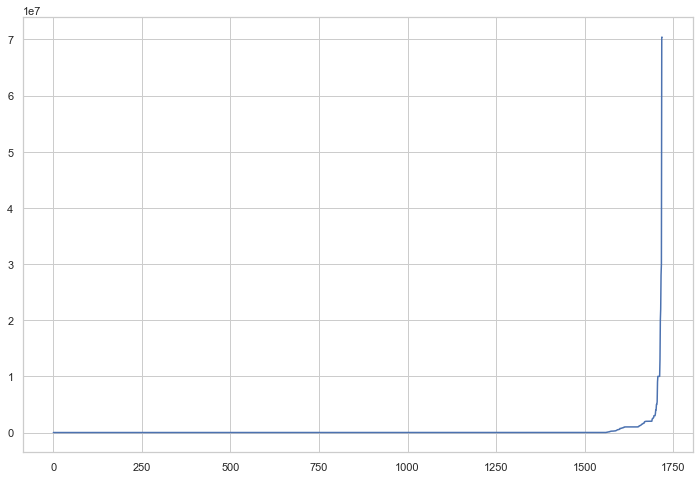

In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [55]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=8).fit(x)
ymeans = db.labels_
ymeans

array([-1, -1, -1, ..., -1, -1, -1], dtype=int32)

In [56]:
unique, counts = np.unique(ymeans, return_counts=True)
unique, counts

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int32),
 array([1663,    9,    9,   11,   10,    9,    9]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


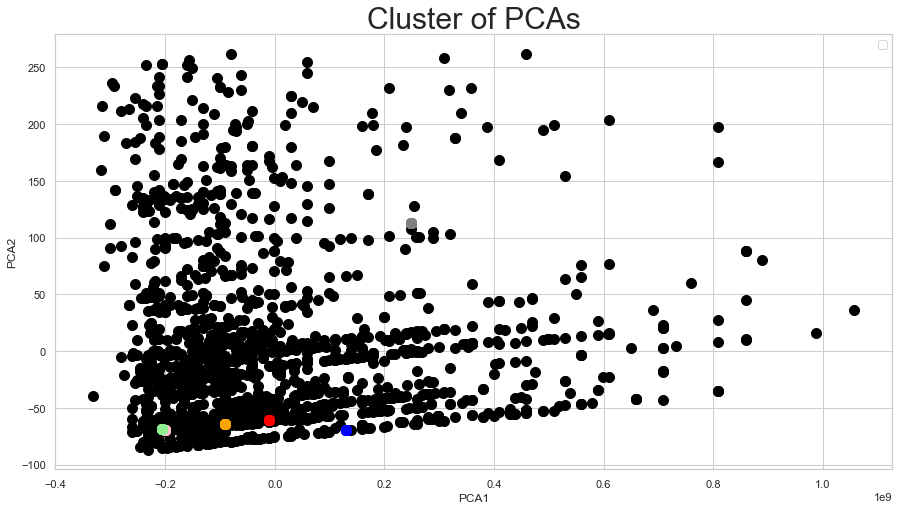

In [57]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.scatter(pca_x[ymeans == 6, 0], pca_x[ymeans == 6, 1], s = 100)
plt.scatter(pca_x[ymeans == 7, 0], pca_x[ymeans == 7, 1], s = 100)
plt.scatter(pca_x[ymeans == 8, 0], pca_x[ymeans == 8, 1], s = 100)
plt.scatter(pca_x[ymeans == 9, 0], pca_x[ymeans == 9, 1], s = 100)
plt.scatter(pca_x[ymeans == 10, 0], pca_x[ymeans == 10, 1], s = 100)
plt.scatter(pca_x[ymeans == 11, 0], pca_x[ymeans == 11, 1], s = 100)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

## YELLOWBRICK

### ELBOW METHOD

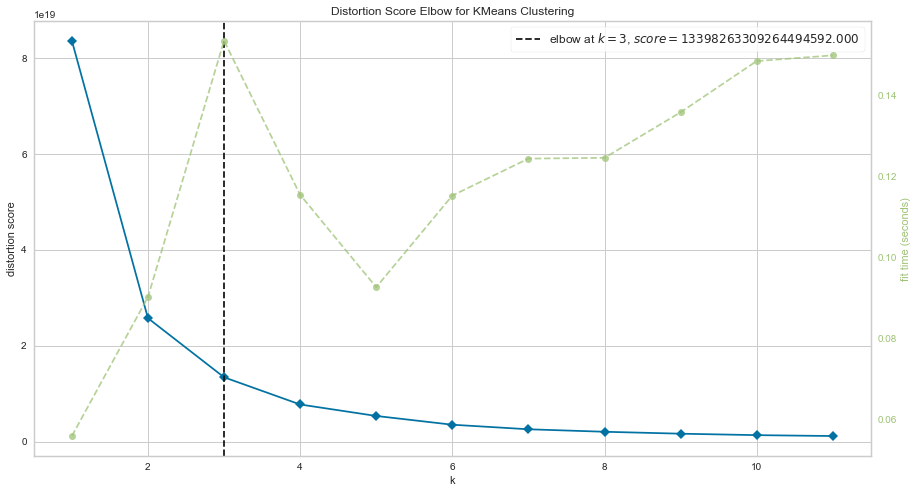

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## SILHOUETTE

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

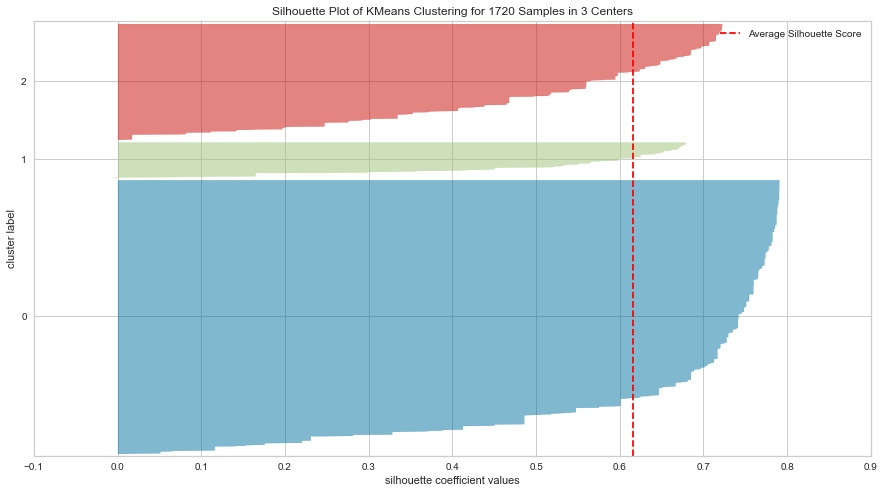

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1720 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure